<a href="https://colab.research.google.com/github/wanasyraf4/01.-Genting-Plantation-Analysis/blob/main/FinalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Ingestion, cleaning and wrangling

In [1]:
import pandas as pd
import numpy as np


In [2]:
# read csv file
url = 'https://raw.githubusercontent.com/wanasyraf4/01.-Genting-Plantation-Analysis/main/oil_palm_production.csv'
data = pd.read_csv(url)


In [3]:
data

,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday
0,1/1/2013,17.630000,5,10.39,1538,0.00,202.0,9.0
1,1/2/2013,17.530000,5,10.39,1538,1.75,215.0,19.0
2,1/3/2013,16.580000,5,10.39,1538,2.00,383.0,15.0
3,1/4/2013,28.940000,5,10.39,1538,0.00,97.0,10.0
4,1/5/2013,25.770000,5,10.39,1538,0.00,75.0,NaN
...,...,...,...,...,...,...,...,...
127,1/8/2023,27.750000,15,8.66,1192,1.75,139.0,12.0
128,1/9/2023,21.679998,15,8.66,1192,0.10,154.0,8.0
129,1/10/2023,23.480000,15,8.66,1192,2.50,265.0,15.0
130,1/11/2023,24.010000,15,8.66,1192,0.00,558.0,21.0


In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.isnull().sum()

,0
Date,0
Production,0
Age,0
Area,0
Palm Stand,0
Fertilizer,0
Rainfall,2
Rainday,3


we can see that there is empty data in some of the column. Fill the missing data with mean of same month

In [5]:
# Fill missing 'Rainfall' and 'Rainday' with the mean of the same month
data['Rainfall'] = data.groupby(data['Date'].dt.month)['Rainfall'].transform(lambda x: x.fillna(x.mean()))
data['Rainday'] = data.groupby(data['Date'].dt.month)['Rainday'].transform(lambda x: x.fillna(x.mean()))

# Extract month and year from 'Date'
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

def age_group(age):
    if age <= 3:
        return 'No Production'
    elif 4 <= age <= 8:
        return 'Low Increasing'
    elif 9 <= age <= 15:
        return 'Optimal'
    elif 16 <= age <= 20:
        return 'Plateauing'
    else:
        return 'Declining'

data['Age_Group'] = data['Age'].apply(age_group)


In [6]:
data

,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group
0,2013-01-01,17.630000,5,10.39,1538,0.00,202.0,9.0,1,2013,Low Increasing
1,2013-02-01,17.530000,5,10.39,1538,1.75,215.0,19.0,2,2013,Low Increasing
2,2013-03-01,16.580000,5,10.39,1538,2.00,383.0,15.0,3,2013,Low Increasing
3,2013-04-01,28.940000,5,10.39,1538,0.00,97.0,10.0,4,2013,Low Increasing
4,2013-05-01,25.770000,5,10.39,1538,0.00,75.0,12.0,5,2013,Low Increasing
...,...,...,...,...,...,...,...,...,...,...,...
127,2023-08-01,27.750000,15,8.66,1192,1.75,139.0,12.0,8,2023,Optimal
128,2023-09-01,21.679998,15,8.66,1192,0.10,154.0,8.0,9,2023,Optimal
129,2023-10-01,23.480000,15,8.66,1192,2.50,265.0,15.0,10,2023,Optimal
130,2023-11-01,24.010000,15,8.66,1192,0.00,558.0,21.0,11,2023,Optimal


No more empty data

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.isnull().sum()

,0
Date,0
Production,0
Age,0
Area,0
Palm Stand,0
Fertilizer,0
Rainfall,0
Rainday,0
Month,0
Year,0


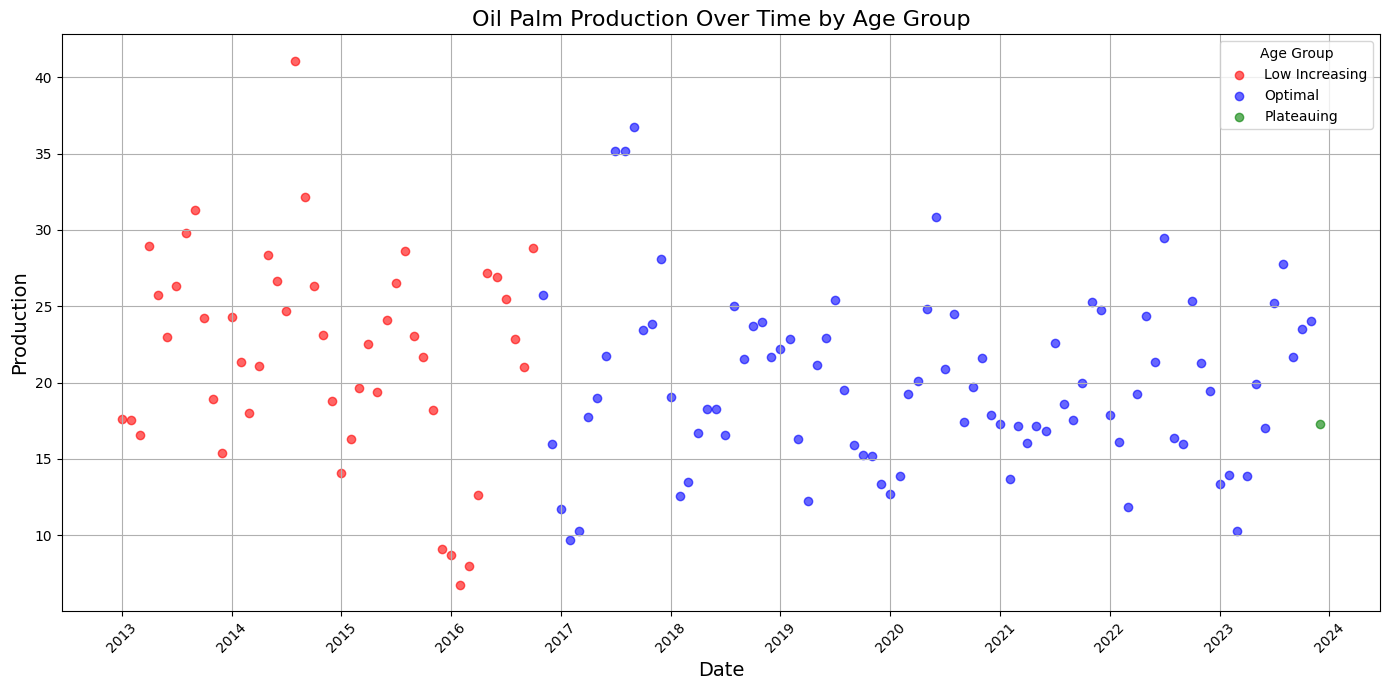

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define a color map for Age Groups
age_groups = data['Age_Group'].unique()
colors = ['red', 'blue', 'green', 'orange', 'purple']
color_dict = {group: color for group, color in zip(age_groups, colors)}

plt.figure(figsize=(14, 7))

for group in age_groups:
    subset = data[data['Age_Group'] == group]
    plt.scatter(subset['Date'], subset['Production'], label=group, color=color_dict[group], alpha=0.6)

plt.title('Oil Palm Production Over Time by Age Group', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.legend(title='Age Group')
plt.grid(True)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


convert it from a categorical variable into a set of binary features that can be fed into regression model for later use

In [9]:
# One-hot encode 'Age_Group'
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)

# Exploratory data Analysis

In [10]:
data.describe()

,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year
count,132,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2018-06-16 13:27:16.363636480,20.588356,10.098485,9.231212,1298.818182,0.880076,246.067424,12.036195,6.500000,2018.000000
min,2013-01-01 00:00:00,6.770000,5.000000,8.660000,1172.000000,0.000000,28.000000,1.000000,1.000000,2013.000000
25%,2015-09-23 12:00:00,16.580000,7.000000,9.010000,1215.000000,0.000000,157.000000,9.000000,3.750000,2015.000000
50%,2018-06-16 00:00:00,20.055000,10.000000,9.020000,1250.000000,0.000000,234.500000,12.000000,6.500000,2018.000000
75%,2021-03-08 18:00:00,24.395000,13.000000,9.020000,1316.000000,1.750000,307.000000,15.000000,9.250000,2021.000000
max,2023-12-01 00:00:00,41.090000,16.000000,10.390000,1538.000000,4.000000,673.000000,23.000000,12.000000,2023.000000
std,NaN,6.085537,3.188385,0.555507,120.706939,1.139330,130.321195,4.667908,3.465203,3.174324


Correlation matrix to understand the relationships between the numerical variables

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data.corr()
corr_matrix


,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group_Optimal,Age_Group_Plateauing
Date,1.000000,-0.194769,0.995854,-0.729995,-8.640199e-01,0.068102,0.190253,0.078306,9.058346e-02,9.958887e-01,0.794133,0.150177
Production,-0.194769,1.000000,-0.234773,0.270326,2.723509e-01,-0.116005,-0.016796,0.052949,3.628642e-01,-2.285069e-01,-0.163239,-0.047103
Age,0.995854,-0.234773,1.000000,-0.730297,-8.643891e-01,0.062851,0.177926,0.069798,4.801910e-02,9.955901e-01,0.795121,0.162334
Area,-0.729995,0.270326,-0.730297,1.000000,9.529152e-01,-0.057103,-0.061210,0.029886,-2.038326e-02,-7.311688e-01,-0.639629,-0.090183
Palm Stand,-0.864020,0.272351,-0.864389,0.952915,1.000000e+00,-0.070492,-0.111558,0.005855,3.568670e-16,-8.675877e-01,-0.790946,-0.077612
Fertilizer,0.068102,-0.116005,0.062851,-0.057103,-7.049200e-02,1.000000,-0.033713,-0.109106,-1.026413e-01,7.777955e-02,0.067795,-0.067746
Rainfall,0.190253,-0.016796,0.177926,-0.061210,-1.115579e-01,-0.033713,1.000000,0.713731,2.808731e-01,1.654995e-01,0.098731,0.114361
Rainday,0.078306,0.052949,0.069798,0.029886,5.855459e-03,-0.109106,0.713731,1.000000,3.572773e-01,4.613681e-02,-0.058856,0.205994
Month,0.090583,0.362864,0.048019,-0.020383,3.568670e-16,-0.102641,0.280873,0.357277,1.000000e+00,1.350366e-14,0.020624,0.139203
Year,0.995889,-0.228507,0.995590,-0.731169,-8.675877e-01,0.077780,0.165499,0.046137,1.350366e-14,1.000000e+00,0.795497,0.138145


Visualization of Correlation Matrix

Strong Positive Correlations:
- Production and Age: Indicates that as the palm trees age (up to a certain point), production increases.
- Production and Fertilizer: Suggests that increased fertilizer application is associated with higher production.
- Production and Rainfall: Shows that adequate rainfall positively affects production.

Strong Negative Correlations:

- Production and Rainday: A higher number of rain days might negatively impact production, possibly due to excessive moisture affecting harvesting or tree health

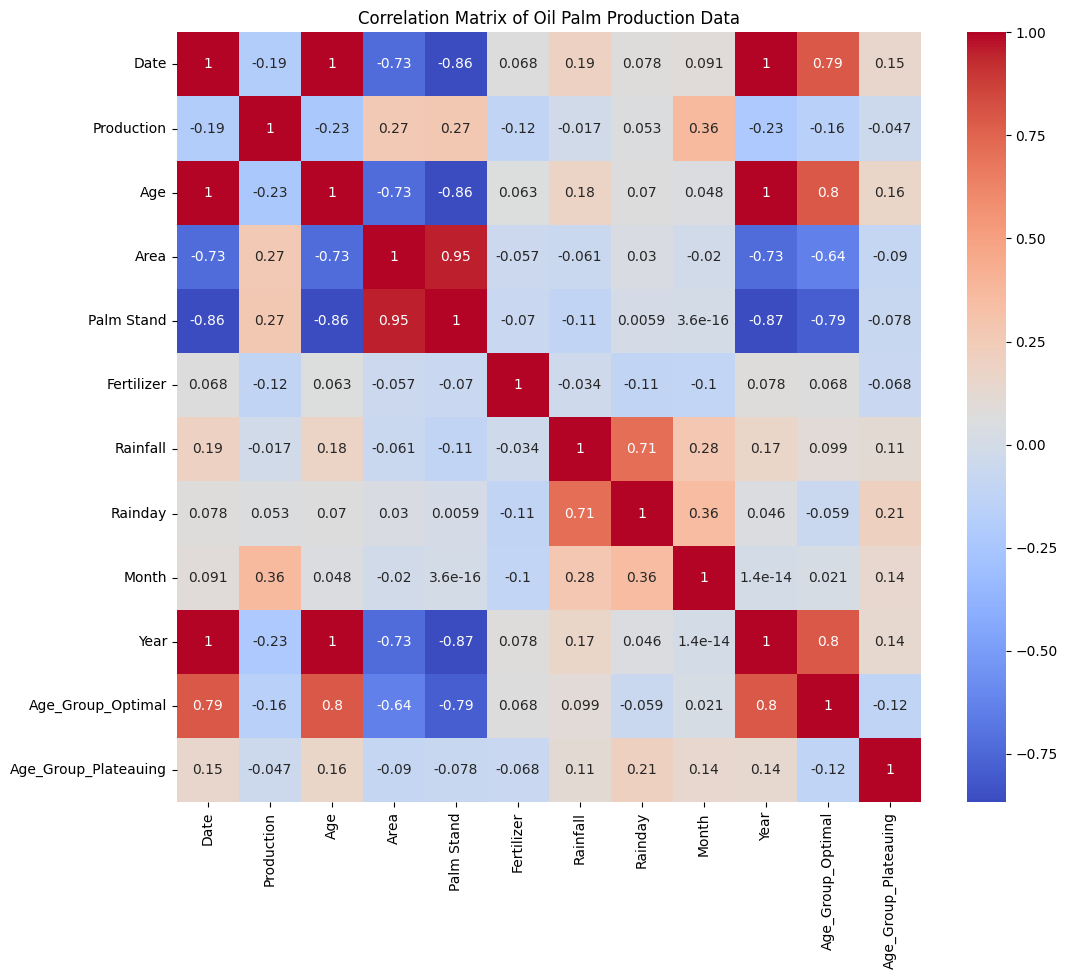

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Oil Palm Production Data')
plt.show()

generate scatter matrix of correlation

Insight we found:

Production x. Age:
we can see that the scatter plot shows a general upward trend up to a certain age, after which production may plateau or decline.

Production x Fertilizer:
graph shows a positive relationship, indicating the importance of fertilizer in production.

Production x Rainfall:
graph displays a non-linear relationship, suggesting that both insufficient and excessive rainfall can affect production.

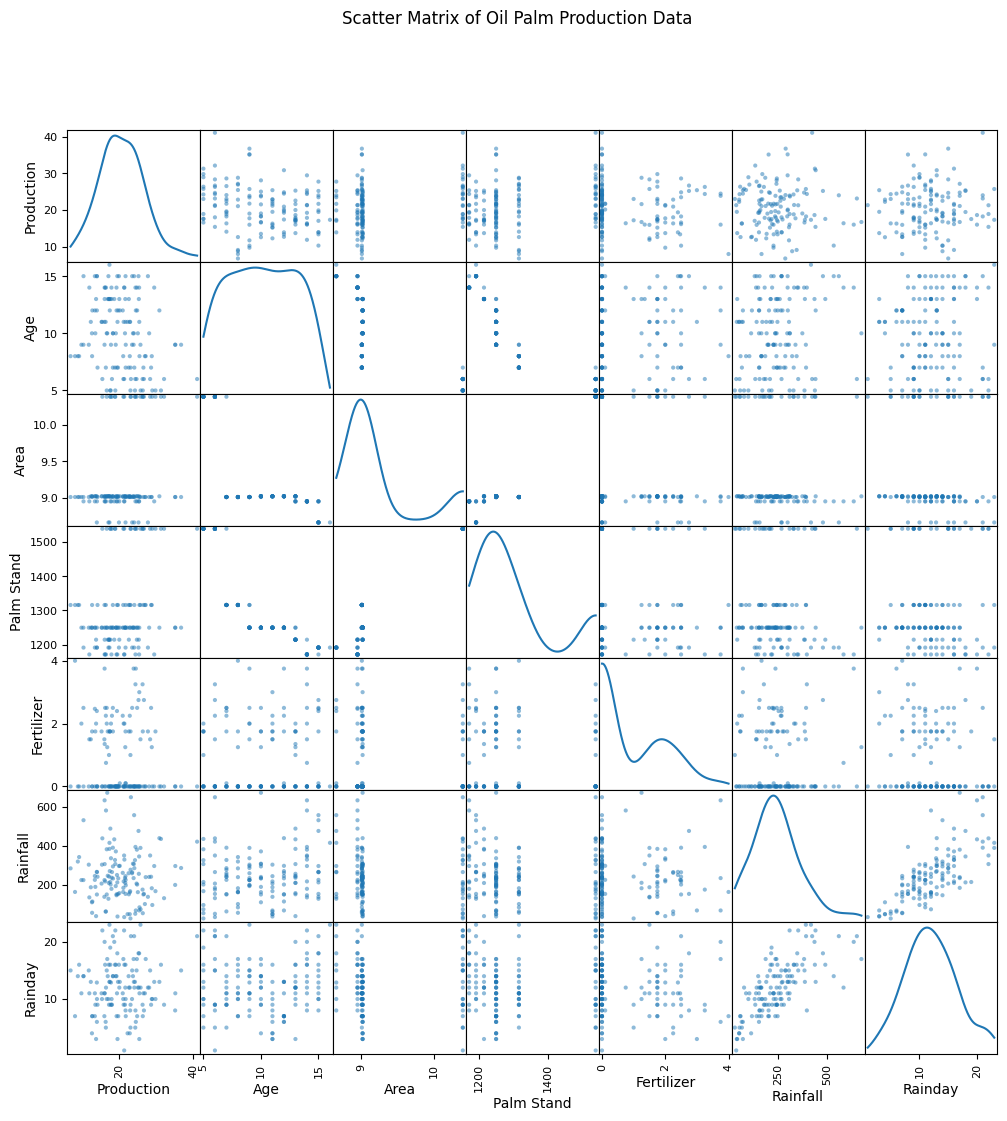

In [13]:
from pandas.plotting import scatter_matrix

cols = ['Production', 'Age', 'Area', 'Palm Stand', 'Fertilizer', 'Rainfall', 'Rainday']
scatter_matrix(data[cols], figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Oil Palm Production Data')
plt.show()

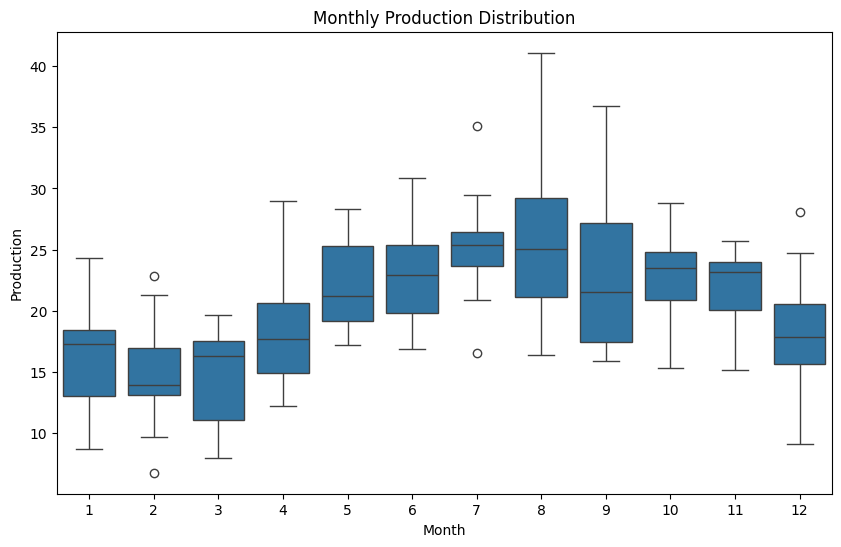

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Production', data=data)
plt.title('Monthly Production Distribution')
plt.show()

The boxplot may reveal seasonal patterns in production, with certain months consistently showing higher or lower production.

## Corellation Analysis

Based on the correlation analysis, the following features have significant correlations with production and will be important

1. Age
2. Fertilizer
3. Rainfall
4. Age_Group categories

# Feature Engineering

Model we will use for prediction is just Random Forest, XGBOOST and Tuned Random Forest

prepare target var

In [15]:
#target variable
y = data['Production']

# dropping non feature 'Date' and 'Production'
X = data.drop(columns=['Date', 'Production'])

# double check missing val
X = X.fillna(X.median())
print("\nMissing Values in Features After Imputation:")
print(X.isnull().sum())



Missing Values in Features After Imputation:
Age                     0
Area                    0
Palm Stand              0
Fertilizer              0
Rainfall                0
Rainday                 0
Month                   0
Year                    0
Age_Group_Optimal       0
Age_Group_Plateauing    0
dtype: int64


scaling for Random Forest, else like xgboost not needed

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Split Train-Test

train data - pre '2023-01-01'

Test data - post '2023-01-01'


In [17]:
train_data = data[data['Date'] < '2023-01-01']
test_data = data[data['Date'] >= '2023-01-01']


visualise data split

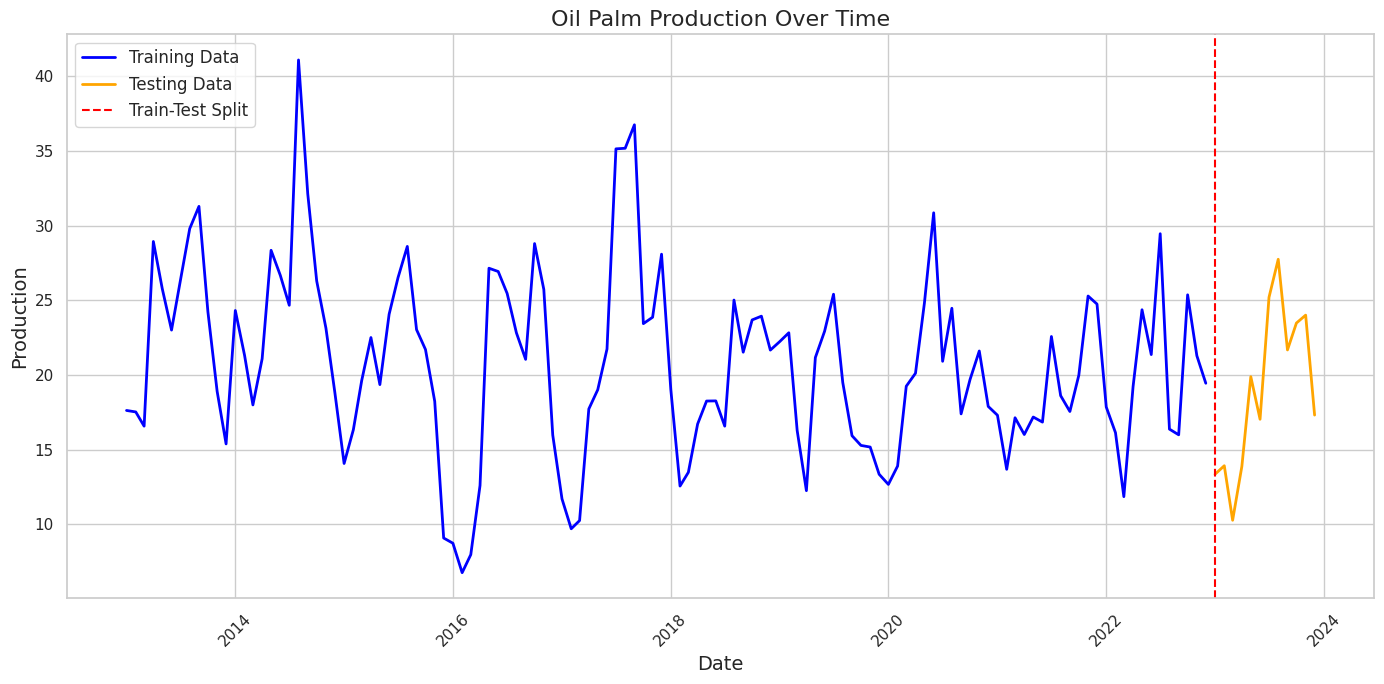

In [18]:

sns.set(style="whitegrid")


plt.figure(figsize=(14, 7))
plt.plot(train_data['Date'], train_data['Production'], label='Training Data', color='blue', linewidth=2)
plt.plot(test_data['Date'], test_data['Production'], label='Testing Data', color='orange', linewidth=2)
plt.axvline(x=pd.to_datetime('2023-01-01'), color='red', linestyle='--', label='Train-Test Split')

# label
plt.title('Oil Palm Production Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Index and convert to 1D array (or vector)

In [19]:
# Align train/test index
X_train = X.loc[train_data.index]
y_train = y.loc[train_data.index]

X_test = X.loc[test_data.index]
y_test = y.loc[test_data.index]

# # chech x test and x train index
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# # Convert to 1D array
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

checked X-Y/ Train test arr

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 12, 120, 12)

Feature Selection with RFECV

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

rf_for_rfe = RandomForestRegressor(random_state=42)
tscv = TimeSeriesSplit(n_splits=5)
rfecv = RFECV(estimator=rf_for_rfe, step=1, cv=tscv, scoring='r2', n_jobs=-1)
rfecv.fit(X_train, y_train)

print(f'\nOptimal number of features: {rfecv.n_features_}')
print('Selected features:', X_train.columns[rfecv.support_].tolist())


Optimal number of features: 10
Selected features: ['Age', 'Area', 'Palm Stand', 'Fertilizer', 'Rainfall', 'Rainday', 'Month', 'Year', 'Age_Group_Optimal', 'Age_Group_Plateauing']


Transform training and testing data to retain only selected features

In [22]:
selected_features = X_train.columns[rfecv.support_].tolist()

In [23]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

Convert to DataFrame

In [24]:
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)


In [25]:
X_train_selected

,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group_Optimal,Age_Group_Plateauing
0,5.0,10.39,1538.0,0.00,202.0,9.0,1.0,2013.0,0.0,0.0
1,5.0,10.39,1538.0,1.75,215.0,19.0,2.0,2013.0,0.0,0.0
2,5.0,10.39,1538.0,2.00,383.0,15.0,3.0,2013.0,0.0,0.0
3,5.0,10.39,1538.0,0.00,97.0,10.0,4.0,2013.0,0.0,0.0
4,5.0,10.39,1538.0,0.00,75.0,12.0,5.0,2013.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
115,14.0,8.95,1172.0,0.75,582.0,12.0,8.0,2022.0,1.0,0.0
116,14.0,8.95,1172.0,3.75,634.0,20.0,9.0,2022.0,1.0,0.0
117,14.0,8.95,1172.0,0.00,346.0,18.0,10.0,2022.0,1.0,0.0
118,14.0,8.95,1172.0,0.00,351.0,22.0,11.0,2022.0,1.0,0.0


In [26]:
X_test_selected

,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group_Optimal,Age_Group_Plateauing
120,15.0,8.95,1192.0,2.47,226.0,11.000000,1.0,2023.0,1.0,0.0
121,15.0,8.95,1192.0,0.00,266.0,10.000000,2.0,2023.0,1.0,0.0
122,15.0,8.95,1192.0,0.00,532.0,14.000000,3.0,2023.0,1.0,0.0
123,15.0,8.66,1192.0,2.40,267.0,12.888889,4.0,2023.0,1.0,0.0
124,15.0,8.66,1192.0,0.00,297.0,16.000000,5.0,2023.0,1.0,0.0
125,15.0,8.66,1192.0,0.00,129.0,10.000000,6.0,2023.0,1.0,0.0
126,15.0,8.66,1192.0,2.75,477.0,18.000000,7.0,2023.0,1.0,0.0
127,15.0,8.66,1192.0,1.75,139.0,12.000000,8.0,2023.0,1.0,0.0
128,15.0,8.66,1192.0,0.10,154.0,8.000000,9.0,2023.0,1.0,0.0
129,15.0,8.66,1192.0,2.50,265.0,15.000000,10.0,2023.0,1.0,0.0


# ML Train and Perf

## Tuned Random Forest

hyperparam tuning is analog to early stopping if in deep learning, but this is ML only

n estimator - tree number (try dynamic tree around 100,200 and 300. Stop when converge) <br/>
max depth - optimal depth (dynamic around 16-32) <br/>
split - (overfit control dunamically at 9,19,29 level) <br/>
lead - branch (dynamic branch at 5, 10, 15. Stop before overfit) <br/>



In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [16, 32, None],
    'min_samples_split': [9, 19, 29],
    'min_samples_leaf': [5, 10, 15]
}


In [28]:
import warnings

# Suppress specific UserWarning from DecisionTreeRegressor
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*DecisionTreeRegressor.*"
)

In [29]:

modelC = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator = modelC,
                           param_grid = param_grid,
                           cv=tscv,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [16, 32, None],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [9, 19, 29],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [30]:
# Show Best model
best_modelC = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 16, 'min_samples_leaf': 15, 'min_samples_split': 9, 'n_estimators': 300}


ModelC perf

In [31]:
# Inferencing
y_pred_modelC = best_modelC.predict(X_test)


#perf
mae_modelC = mean_absolute_error(y_test, y_pred_modelC )
rmse_modelC = np.sqrt(mean_squared_error(y_test, y_pred_modelC ))
r2_modelC = r2_score(y_test, y_pred_modelC)

print("\nPerformance Metrics on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_modelC :.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_modelC :.2f}')
print(f'R-squared: {r2_modelC :.2f}')


Performance Metrics on Test Set:
Mean Absolute Error (MAE): 3.38
Root Mean Squared Error (RMSE): 3.73
R-squared: 0.50


# Predict using the model trained

See last timestamp data

In [32]:
data.tail(3)

,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group_Optimal,Age_Group_Plateauing
129,2023-10-01,23.480000,15,8.66,1192,2.5,265.0,15.0,10,2023,True,False
130,2023-11-01,24.010000,15,8.66,1192,0.0,558.0,21.0,11,2023,True,False
131,2023-12-01,17.320002,16,8.66,1192,0.0,416.0,23.0,12,2023,False,True


last data at dec 2023, start predict jan 24, feb 24, mar 24

In [33]:
data.head(3)

,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group_Optimal,Age_Group_Plateauing
0,2013-01-01,17.63,5,10.39,1538,0.00,202.0,9.0,1,2013,False,False
1,2013-02-01,17.53,5,10.39,1538,1.75,215.0,19.0,2,2013,False,False
2,2013-03-01,16.58,5,10.39,1538,2.00,383.0,15.0,3,2013,False,False


In [34]:
# Define future months
future_months = ['2024-01-01', '2024-02-01', '2024-03-01']
future_dates = pd.to_datetime(future_months, format='%Y-%m-%d')

# Create future DataFrame
future_data = pd.DataFrame({'Date': future_dates})
future_data

,Date
0,2024-01-01
1,2024-02-01
2,2024-03-01


Define base year and initial age

In [35]:
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month
base_year = 2013
initial_age = 5

In [36]:
# Calculate 'Age' for future dates
future_data['Age'] = initial_age + (future_data['Year'] - base_year)



In [37]:
# Define 'Age_Group'
future_data['Age_Group'] = future_data['Age'].apply(age_group)

# Calculate historical monthly averages for 'Rainfall' and 'Rainday'
rainfall_monthly_avg = data.groupby('Month')['Rainfall'].mean()
rainday_monthly_avg = data.groupby('Month')['Rainday'].mean()
future_data['Rainfall'] = future_data['Month'].map(rainfall_monthly_avg)
future_data['Rainday'] = future_data['Month'].map(rainday_monthly_avg)

# One-hot encode 'Age_Group' with drop_first=True
future_data = pd.get_dummies(future_data, columns=['Age_Group'], drop_first=True)


In [38]:
# check missing val
missing_cols = set(selected_features) - set(future_data.columns)
missing_cols

{'Age_Group_Optimal',
 'Age_Group_Plateauing',
 'Area',
 'Fertilizer',
 'Palm Stand'}

In [41]:
for col in missing_cols:
    future_data[col] = X[col].mean()

missing_cols

{'Age_Group_Optimal',
 'Age_Group_Plateauing',
 'Area',
 'Fertilizer',
 'Palm Stand'}

# Physics Informed ML Inferencing for forecasting

In [42]:
# Scale the future data using the already fitted scaler
future_data = future_data[selected_features]
X_future_scaled = pd.DataFrame(scaler.transform(future_data), columns=future_data.columns)

# Predict production using the trained model
future_predictions = best_modelC.predict(X_future_scaled)
future_data['Predicted_Production'] = future_predictions

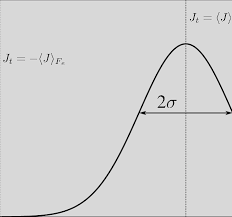

In [47]:

# Get individual tree predictions for Stochastic variation
tree_predictions = np.array([tree.predict(X_future_scaled) for tree in best_modelC.estimators_])
pred_mean = tree_predictions.mean(axis=0)
pred_std = tree_predictions.std(axis=0)
pred_var = tree_predictions.var(axis=0)
future_predictions_stochastic = 2*(pred_mean/pred_var) + np.random.normal(3, 2*pred_std)

# Add predictions to future_data
future_data['Predicted_Production'] = future_predictions_stochastic
future_data['Production_std'] = pred_std
future_data_with_date = future_data.copy()
future_data_with_date['Date'] = future_dates

# Reorder columns to have 'Date' first
future_data_with_date = future_data_with_date[['Date', 'Predicted_Production', 'Production_std']]

# View the predictions
print("\nPredicted Production for January, February, and March 2024:")
print(future_data_with_date[['Date', 'Predicted_Production', 'Production_std']])


Predicted Production for January, February, and March 2024:
        Date  Predicted_Production  Production_std
0 2024-01-01             20.930504        1.226088
1 2024-02-01             26.557658        1.226088
2 2024-03-01             18.814577        1.226088


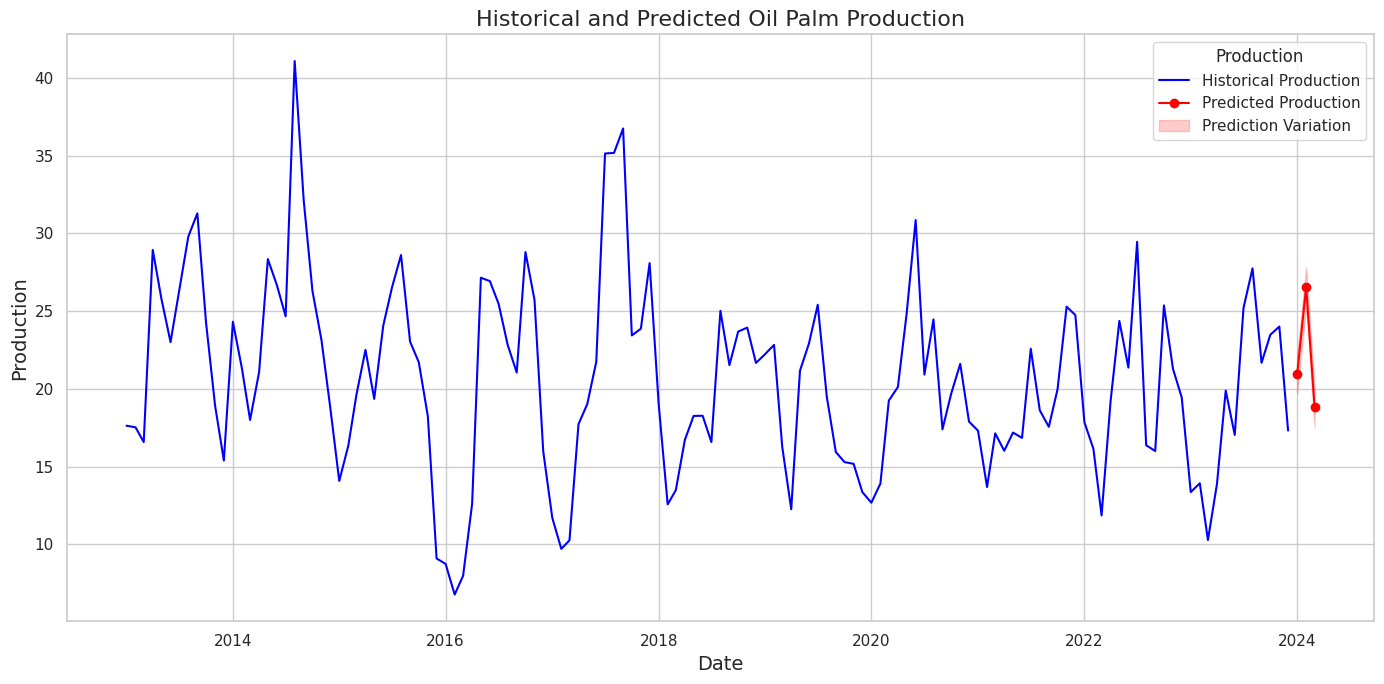

In [48]:
plt.figure(figsize=(14, 7))

# Plot historical production
plt.plot(data['Date'], data['Production'], label='Historical Production', color='blue')

# Plot predicted production
plt.plot(future_data_with_date['Date'], future_data_with_date['Predicted_Production'],
         label='Predicted Production', color='red', marker='o')
plt.fill_between(future_data_with_date['Date'],
                 future_data_with_date['Predicted_Production'] - future_data_with_date['Production_std'],
                 future_data_with_date['Predicted_Production'] + future_data_with_date['Production_std'],
                 color='red', alpha=0.2, label='Prediction Variation')

plt.title('Historical and Predicted Oil Palm Production', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.legend(title='Production')
plt.grid(True)
plt.tight_layout()
plt.show()